
<h1>Decision Trees and Machine Learning</h1>

<li>Decision trees are tree structures containing rules
<li>The leaf nodes of the tree are the "learned" categories (or threshold values)
<li>A path from the root to a leaf node represents a rule (or a decision path)

<h3>Example: A decision tree with rules on deciding who survived or died on the titanic</h3>
<i>Source: https://en.wikipedia.org/wiki/Decision_tree_learning#/media/File:CART_tree_titanic_survivors.png</i>
<li>To use the tree, enter a person-data object and you'll get an answer</li>
<li>Ex: ("John Brown","Male","30 years old", "3 siblings") Ans: Survived (89% probability)
<li>Ex: ("Jessica Jones", "Female","7 years old", "no siblings") Ans: Survived (73% probability)
<li>Ex: ("Hercules Mulligan", "Male", "2 years old", "20 siblings") Ans: Died (17% probability)
<li>Note that the 17% probability doesn't mean that there is an 83% chance that Mulligan survived!

In [1]:
from IPython.display import Image
Image(filename = "CART_tree_titanic_survivors.png", width=400, height=400)

<h2>Why decision trees?</h2>
<li>Easy to understand 
<li>Rule finding process is transparent
<li>Can handle "mixed" categorical(male/female) and numerical (age, number of siblings) data
<li>Can handle missing data 
<li>Can be used to generate partial "good" solutions

<h2>Why not decision trees?</h2>
<li>Finding an optimal tree is a hard problem
<li>Overfitting is a YUGE problem

<h2>Types of decision trees</h2>
<ul>
<li><b>Classification trees</b>: Uses rules to classify cases into two or more categories (Rocks vs Mines)
<ul>
<li>Classification trees recursively split the data on a feature value
<li>Each split minimizes the entropy (also known as the impurity)
<li>Entropy is commonly measured using the GINI cost function (a measure of the probability of misclassification or 'purity')
</ul>
<li><b>Regression trees</b>: Uses rules to group data into target variable ranges (Wine Quality)
<ul>
<li>Also split the data on feature values
<li>Minimize cost (impurity). Usually the mean squared error
</ul>
</ul>

<h3>Stopping and Pruning Rules</h3>
<li>A minimum count of observations in each leaf node
<li>A maximum tree <b>depth</b>
<li>A maximum <b>complexity</b> (the number of splits)
<li>Using all three, you won't necessarily have a balanced tree

<h2>Predicting wine quality using a decision tree</h2>

<h3>Import the data</h3>

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
import pandas as pd
from pandas import DataFrame
w_df = pd.read_csv(url,header=0,sep=';')
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<h4>Examining the dependent variable</h4>

In [3]:
w_df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [4]:
w_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
# w_df.describe()

<li>Higher dv values indicate a better quality wine
<li>Lower dv values indicate a poorer quality wine
<li>We'll assume that the values are continuous
<li>And use the various features to predict wine quality

<h4>Build train and test samples</h4>

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(w_df, test_size = 0.3)
x_train = train.iloc[0:,0:11]
y_train = train[['quality']]
x_test = test.iloc[0:,0:11]
y_test = test[['quality']]



<h3>Classifiers vs Regressors</h3>
<li>Decision tree regressors are used when the target variable is continuous and ordered (wine quality from 0 to 10)
<li>Classifiers are used when the target variable is a set of unordered categories (rocks or mines)

<h4>For wine quality, we need a regressor</h4>

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth=3)
#model = DecisionTreeRegressor(max_depth = 3)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

Details: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [8]:
#Get the R-Square for the predicted vs actuals on the text sample
print("Training R-Square",model.score(x_train,y_train))
print("Testing R-Square",model.score(x_test,y_test))

Training R-Square 0.33339721907323083
Testing R-Square 0.3243279361971223


<h3>View the tree</h3>

<h3>Download and install <a href="http://www.graphviz.org/Download.php">graphviz</a></h3>
If you are having issues using Graphviz in Windows, then try the following steps:
<ol>
<li>1. Install Graphviz 
<li>2. After installing graphviz, add it to the Computer's Path. 
<ul>
<li>Go to PC properties 
<li> Click environment variables in the advanced settings section
<li> Add C:\Program Files (x86)\Graphviz2.38\bin\ to the PATH and click Apply
</ul>
<li> Install Pydotplus. <b>Note that you will always have to install pydot after graphviz as Pydot is Graphviz's dot language and needs Graphviz for reference</b>. 
</ol>
<h3>Install pydotplus (using pip): Install graphviz before you install pydotplus!</h3> 

In [9]:
# !pip install pydotplus --upgrade

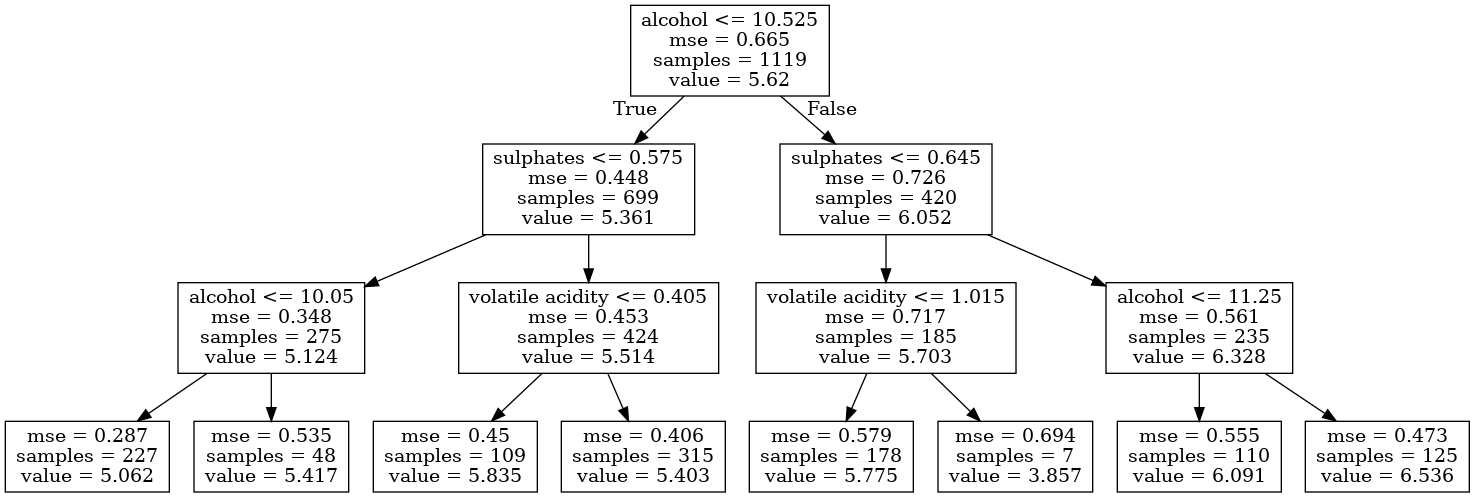

In [10]:
#import pydotplus 
feature_names = [key for key in w_df if not key=='quality']
from IPython.display import Image
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names)
import pydotplus

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())


<h3>Decision trees are Entropy minimizers</h3>
<li><b>Entropy</b>: a measure of uncertainty in the data<p>
<ul>
<li>what is the uncertainty in color when you draw a marble from a box of 100 blue marbles?
<li>what is the uncertainty when you draw a marble from a box with 50 blue and 50 red marbles?
</ul>
<li>Entropy minimization: decision tree algorithms seek to partition the data on features in the way that total entropy is minimized

<h2>The danger of entropy minimization</h2>
<li>In the degenerate case, we can build rules that partition the data into single case subsets
<li>The resulting combined entropy will be zero!
<li>But the results will be useless because we will likely not be able to predict anything if we get a new case


<h2>Example</h2>
<li>Feature set = {SSN,GENDER,GRE}
<li>DV = {GPA}
<li>Output rules:
<ul>
<li>if SSN = x1 then 3.2
<li>if SSN = x2 then 4.2
<li>One rule for each SSN in our training dataset
</ul>
<li>This will be totally useless in predicting what a the gpa of a new student is likely to be

<h3>Regression trees</h3>
<li>Run regressions for each X to the dependent variable
<li>Pick the variable with the most explanatory power and split it at several points
<li>Calculate the Mean Square Error of each of the two halves for each split
<li>Pick the split point that gives the lowest mse (combined)

<h1>Classification trees</h1>
<h2>Classification trees are used when dealing with categorical dependent variables</h2>
<li>Pick a variable and a split point so that the misclassification cost is the lowest.

<h3>Rocks and mines data set</h3>

In [11]:
import pandas as pd
import numpy as np
from pandas import DataFrame
url="https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
df = pd.read_csv(url,header=None)
df[60]=np.where(df[60]=='R',0,1)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.533654
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,1.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3)
x_train = train.iloc[0:,0:60]
y_train = train[[60]]
x_test = test.iloc[0:,0:60]
y_test = test[[60]]
# y_train

In [13]:
# y_train

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 3,criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

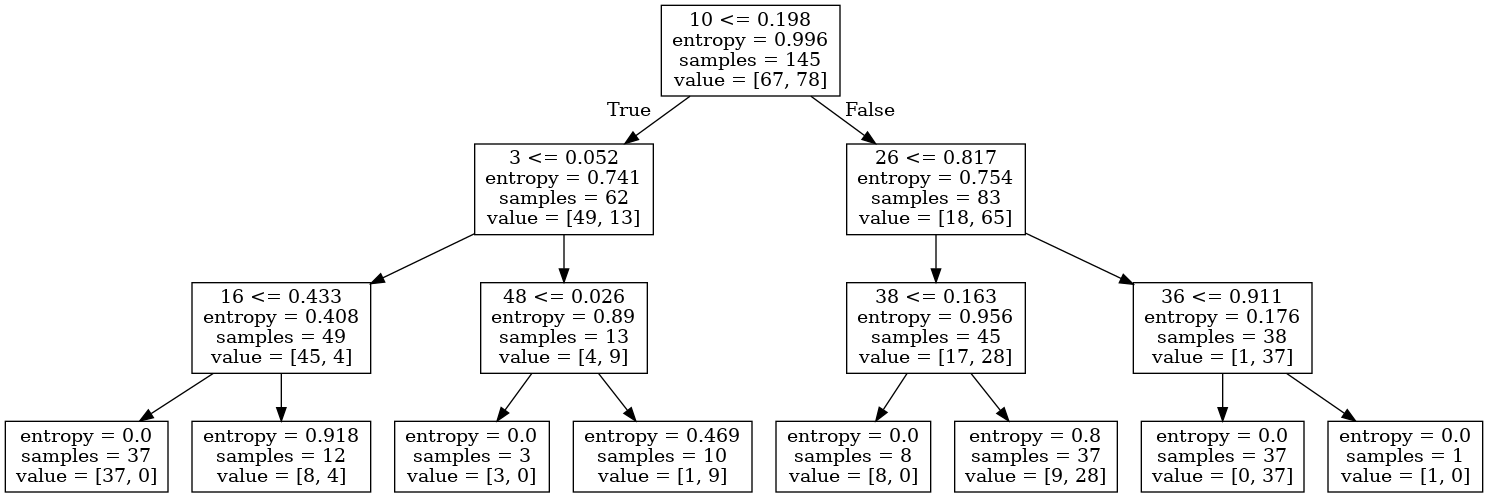

In [15]:
import pydotplus 
from IPython.display import Image
feature_names = [key for key in df if not key == 60]
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names) 
#graph = pydotplus.graph_from_dot_data(dot_data) 

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())


In [37]:
np.argsort(model.feature_importances_)

AttributeError: 'BaggingClassifier' object has no attribute 'feature_importances_'

In [17]:
from sklearn.metrics import confusion_matrix
p_train=model.predict(x_train)
p_test = model.predict(x_test)
# print(confusion_matrix(p_train,np.array(y_train)))
print(confusion_matrix(p_test,np.array(y_test)))

[[16  4]
 [14 29]]


In [18]:
confusion_matrix(np.array(y_test),p_test)

array([[16, 14],
       [ 4, 29]])

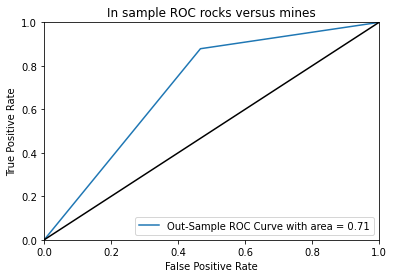

In [19]:
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(y_test,p_test)
area = auc(fpr,tpr)
pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample ROC rocks versus mines')
pl.legend(loc="lower right")
pl.show()


In [20]:
# fpr,tpr,thresholds

<h1>Random forests</h1>
<li>Build many decision trees from the data set
<li>Let them "vote" on how to classify inputs


<h2>Ensemble learning random forests</h2>
<li>Use a random subset of features and choose the feature to split on from this subset
<li>Repeat the process, this gives multiple different trees (the ensemble)
<li>The model then predicts y values by letting the trees vote 
<ul>
<li>The forest is given a case
<li>Each tree decides which class the case belongs to
<li>Votes are tallied
<li>The highest vote wins
</ul>

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)
#np.ravel flattens the pandas Series into an np array. That's what the classifier needs
model.fit(x_train,np.ravel(y_train))

RandomForestClassifier(n_estimators=10)

In [22]:
# type(np.ravel(y_train))

<h3>Accuracy</h3>
<li>The "score" function returns the accuracy of the model (percentage correctly classified)

In [23]:
model.score(x_test,y_test)

0.8412698412698413

In [24]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cfm = confusion_matrix(np.ravel(y_test),y_pred)
cfm

array([[23,  7],
       [ 3, 30]])

In [25]:
# confusion_matrix(y_test,y_pred)

<h2>Feature importance</h2>
<li>Since ensemble methods are picking different features in different trees, they can provide us with an estimate of feature importance
<li>For each feature, the model calculates by how much entropy decreases (net across levels) by selecting it

Text(0.5, 0, 'Relative Importance')

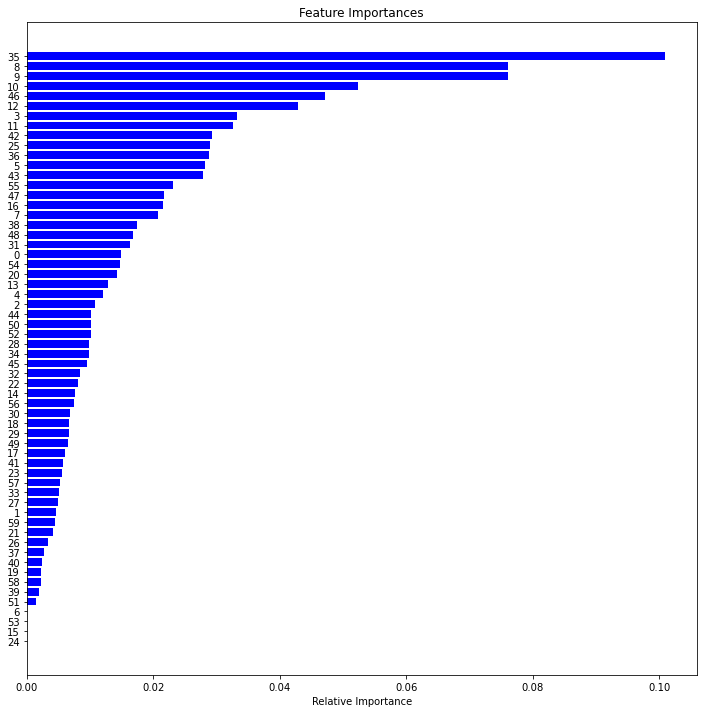

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)),feature_names)
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

In [38]:
importances

array([0.01487845, 0.00466305, 0.01080332, 0.03317806, 0.01195758,
       0.02818028, 0.        , 0.02064372, 0.0761145 , 0.0760738 ,
       0.05229525, 0.03263993, 0.0428331 , 0.01280489, 0.00756848,
       0.        , 0.02145481, 0.00594872, 0.00666373, 0.00222478,
       0.01425181, 0.00419378, 0.00812822, 0.00552381, 0.        ,
       0.02896242, 0.00335108, 0.00498363, 0.0098689 , 0.00662459,
       0.00676274, 0.016245  , 0.00838232, 0.0049932 , 0.00977016,
       0.10082502, 0.02882895, 0.0027442 , 0.01743991, 0.00187848,
       0.00231216, 0.00567849, 0.02918705, 0.02778981, 0.01016883,
       0.00943183, 0.04709711, 0.02171462, 0.01673305, 0.00643597,
       0.01014233, 0.00138095, 0.01012934, 0.        , 0.01466978,
       0.0230411 , 0.00739956, 0.00528473, 0.00222478, 0.00449383])

In [39]:
print(importances)
print(np.argsort(importances))
print(importances[24],importances[15],importances[8],importances[35])

[0.01487845 0.00466305 0.01080332 0.03317806 0.01195758 0.02818028
 0.         0.02064372 0.0761145  0.0760738  0.05229525 0.03263993
 0.0428331  0.01280489 0.00756848 0.         0.02145481 0.00594872
 0.00666373 0.00222478 0.01425181 0.00419378 0.00812822 0.00552381
 0.         0.02896242 0.00335108 0.00498363 0.0098689  0.00662459
 0.00676274 0.016245   0.00838232 0.0049932  0.00977016 0.10082502
 0.02882895 0.0027442  0.01743991 0.00187848 0.00231216 0.00567849
 0.02918705 0.02778981 0.01016883 0.00943183 0.04709711 0.02171462
 0.01673305 0.00643597 0.01014233 0.00138095 0.01012934 0.
 0.01466978 0.0230411  0.00739956 0.00528473 0.00222478 0.00449383]
[24 15 53  6 51 39 58 19 40 37 26 21 59  1 27 33 57 23 41 17 49 29 18 30
 56 14 22 32 45 34 28 52 50 44  2  4 13 20 54  0 31 48 38  7 16 47 55 43
  5 36 25 42 11  3 12 46 10  9  8 35]
0.0 0.0 0.07611449754387635 0.10082501934181406


In [41]:
np.array(feature_names)[indices]
feature_names

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59]

<h3>Finding the best ensemble</h3>
<li>Using a gridsearch, we can run the random forest classifier on various parameter combinations
<li>And then use the classifier with the best accuracy score

In [29]:
from sklearn.model_selection import GridSearchCV
parameters = {
     'n_estimators':(10, 30, 50), #the number of trees
     'max_depth':(4,5,6,8,10,15),
     'min_samples_split': (2, 4, 8),
     'min_samples_leaf': (4,8,12,16)
}

model = GridSearchCV(RandomForestClassifier(),parameters,cv=3,iid=False)
model.fit(x_train, np.ravel(y_train))
model.best_score_, model.best_params_

/home/uday/anaconda3/envs/data_analytics/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


(0.834750566893424,
 {'max_depth': 4,
  'min_samples_leaf': 4,
  'min_samples_split': 8,
  'n_estimators': 30})

In [30]:
b_model = RandomForestClassifier(max_depth=6,min_samples_leaf=4,min_samples_split=4,n_estimators=10)
b_model.fit(x_train,np.ravel(y_train))
from sklearn.metrics import confusion_matrix
y_pred = b_model.predict(x_test)
cfm = confusion_matrix(np.ravel(y_test),y_pred)
cfm

array([[18, 12],
       [ 2, 31]])

In [31]:
b_model = RandomForestClassifier(max_depth=15,min_samples_leaf=4,min_samples_split=8,n_estimators=50)
b_model.fit(x_train,np.ravel(y_train))
from sklearn.metrics import confusion_matrix
y_pred = b_model.predict(x_test)
cfm = confusion_matrix(np.ravel(y_test),y_pred)
cfm

array([[18, 12],
       [ 6, 27]])

In [32]:
# b_model.score(x_test,y_test)

<h2>Bootstrapping</h2>
<li>Create a synthetic dataset by drawing sample cases "with replacement"
<li>Run the decision tree algorithm on this dataset
<li>Repeat on multiple such synthetic datasets
<li>Let the many trees vote on the class for each case

In [33]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier()
model.fit(x_train,np.ravel(y_train))

BaggingClassifier()

In [34]:
# model.score(x_test,y_test)

In [35]:
from sklearn.model_selection import GridSearchCV
parameters = {
     'n_estimators':(30, 50), #the number of trees
     'max_samples':(30,40,50),
     'max_features':(5,10,20),
     #'oob_score':np.ravel(y_test)
     
}

model = GridSearchCV(BaggingClassifier(),parameters,cv=3,iid=False)
model.fit(x_train, np.ravel(y_train))
model.best_score_, model.best_params_

/home/uday/anaconda3/envs/data_analytics/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


(0.8212868480725622,
 {'max_features': 10, 'max_samples': 50, 'n_estimators': 30})

In [36]:
model=BaggingClassifier(max_features=5,max_samples=10,n_estimators=30)
model.fit(x_train,np.ravel(y_train))
model.score(x_test,y_test)

0.7142857142857143

<h2>Why random forests?</h2>
<li>Can deal with missing data
<ul>
<li>If a feature is missing from a case, that case is discarded when a feature is considered for inclusion in the tree
<li>In ensemble learning, since we're working with subsets of the features, every feature will figure in some tree or the other (and will have a vote)
</ul>
<li>Useful when the data available is small

<h2>Why not random forests?</h2>
<li>Danger of overfitting, especially when the sample is small or when the number of classes is small
<li>Can't explain the results. The rules are opaque since many trees are voting